In [128]:
# nltk.download('sentiwordnet')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# !pip install NRCLex
# !pip install contractions
# from textblob import download_corpora
# download_corpora.download_all()

In [129]:
#Loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from nrclex import NRCLex


import re
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from string import punctuation
import contractions

In [130]:
df=pd.read_csv("YoutubeCommentsDataSet.csv")

In [131]:
#Analiza wizualna danych
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [132]:
df.columns.values.tolist()

['Comment', 'Sentiment']

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [ ]:
#We see that we have null comments having sentiment. Let's check what are their sentiments

In [135]:
null_comments = df[df["Comment"].isnull()]
null_comments

,Comment,Sentiment
602,NaN,negative
716,NaN,neutral
812,NaN,positive
1021,NaN,positive
1023,NaN,neutral
1041,NaN,positive
1094,NaN,positive
2443,NaN,positive
3014,NaN,positive
3235,NaN,positive


In [ ]:
#As we can see there is no pattern, therefore we'll delete this comments as there is nothing to analyze their sentiment from

In [137]:
df = df.dropna(subset=["Comment"])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18364 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18364 non-null  object
dtypes: object(2)
memory usage: 430.4+ KB


In [ ]:
#Analiza ilościowa danych

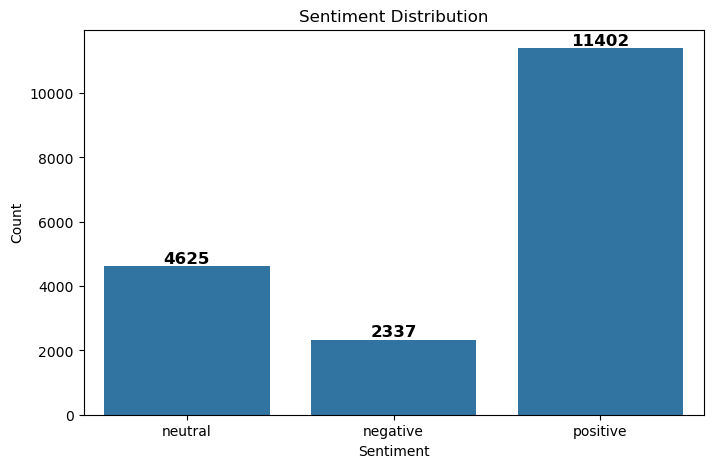

In [187]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["Sentiment"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [140]:
df["length"]=df["Comment"].apply(len)
df.head()

,Comment,Sentiment,length
0,lets not forget that apple pay in 2014 require...,neutral,317
1,here in nz 50 of retailers don’t even have con...,negative,163
2,i will forever acknowledge this channel with t...,positive,183
3,whenever i go to a place that doesn’t take app...,negative,450
4,apple pay is so convenient secure and easy to ...,positive,135


In [ ]:
#Dzielimy komentarze na: bardzo krótkie, krótkie, średnie oraz długie

In [141]:
bins = [0,100, 250, 1000, float("inf")]
labels = ["0-100","100-250", "250-1000", "1000+"]

df["comment_length_bin"] = pd.cut(df["length"], bins=bins, labels=labels, right=False)


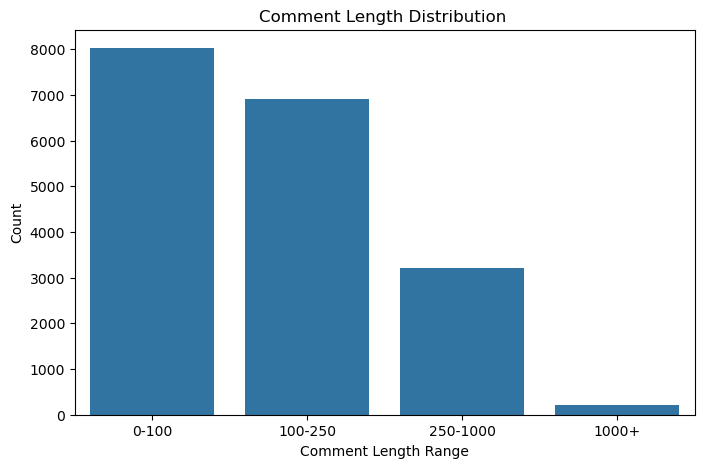

In [142]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["comment_length_bin"], order=labels)
plt.title("Comment Length Distribution ")
plt.xlabel("Comment Length Range")
plt.ylabel("Count")
plt.show()

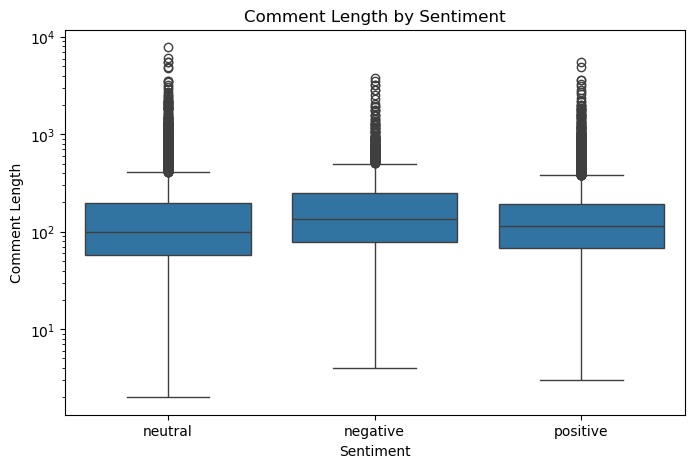

In [143]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Sentiment", y="length", data=df)
plt.yscale("log")
plt.title("Comment Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Comment Length")
plt.show()


In [144]:
## VADER
#Wykorzystujemy bibliotekę vader która analizuje sentyment wypowiedzi na podstawie użytych w nich słów, emotikonów oraz znaków interpunkcyjnych np. "!!!"
#Poszczególne kolumny vader_pos, vader_neg, vader_neu, vader_score oznaczają odpowiednio:
#Odsetek negatywnych emocji (wartość od 0 do 1).
#Odsetek neutralnych emocji (wartość od 0 do 1).
#Odsetek pozytywnych emocji (wartość od 0 do 1).
#Złożony wynik sentymentu (od -1 do +1).

In [145]:
sia = SentimentIntensityAnalyzer()

In [146]:
def count_sentiment_words(comment):
    scores = sia.polarity_scores(comment)
    return scores['pos'], scores['neg'], scores['neu'], scores['compound']

In [147]:
df[['vader_pos', 'vader_neg','vader_neu', 'vader_score']] = df['Comment'].apply(lambda x: pd.Series(count_sentiment_words(x)))

In [148]:
df.head()

,Comment,Sentiment,length,comment_length_bin,vader_pos,vader_neg,vader_neu,vader_score
0,lets not forget that apple pay in 2014 require...,neutral,317,250-1000,0.151,0.024,0.825,0.6774
1,here in nz 50 of retailers don’t even have con...,negative,163,100-250,0.289,0.039,0.672,0.8360
2,i will forever acknowledge this channel with t...,positive,183,100-250,0.295,0.000,0.705,0.8718
3,whenever i go to a place that doesn’t take app...,negative,450,250-1000,0.029,0.198,0.774,-0.8914
4,apple pay is so convenient secure and easy to ...,positive,135,100-250,0.257,0.113,0.629,0.6786


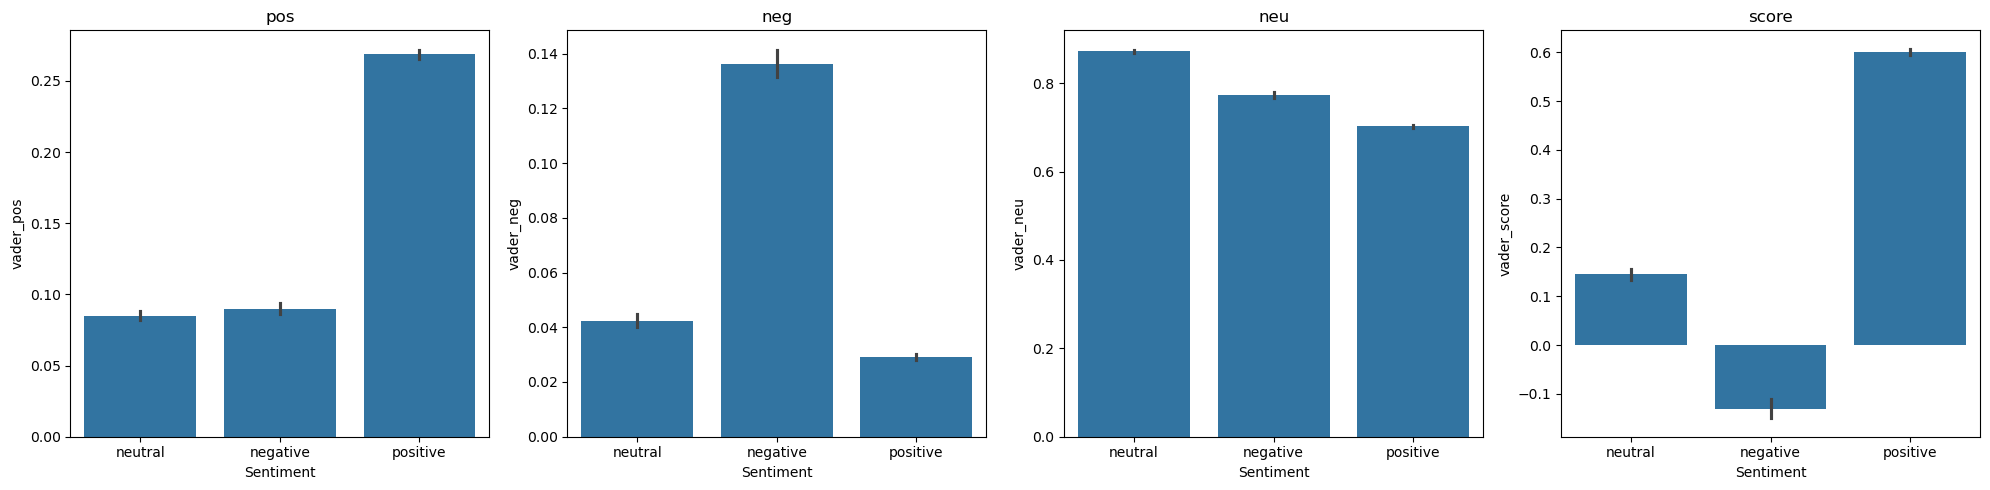

In [149]:
#Analiza wyników działania vadera na podstawie sentymentu wypowiedzi
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
sns.barplot(data = df, x = 'Sentiment', y = 'vader_pos',ax = axs[0])
sns.barplot(data = df, x = 'Sentiment', y = 'vader_neg',ax = axs[1])
sns.barplot(data = df, x = 'Sentiment', y = 'vader_neu', ax = axs[2])
sns.barplot(data = df, x = 'Sentiment', y = 'vader_score', ax = axs[3])
axs[0].set_title('pos')
axs[1].set_title('neg')
axs[2].set_title('neu')
axs[3].set_title('score')
plt.tight_layout()
plt.show()

In [150]:
scaler = MinMaxScaler()
df[['vader_score_norm']] = scaler.fit_transform(df[['vader_score']])

In [151]:
df['Clean_Comment'] = df['Comment'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['Clean_Comment'] = df['Comment'].apply(lambda x: ''.join([char.lower() for char in x if char not in string.punctuation]))
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def is_emotional(word):
    emotions = NRCLex(word).affect_frequencies
    return any(value > 0 for value in emotions.values())

filtered_stop_words = {word for word in stop_words if not is_emotional(word)}

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    text = contractions.fix(text)
    
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word not in filtered_stop_words]
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    tokens = [word for word in tokens if word not in punctuation]
    
    return " ".join(tokens)
df['Clean_Comment'] = df['Comment'].apply(preprocess_text)
df['Tokenized_Comment'] = df['Clean_Comment'].apply(lambda x: x.split())

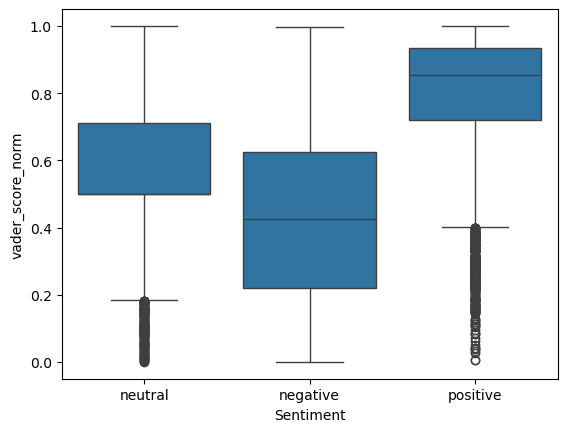

In [152]:
sns.boxplot(data = df, x = 'Sentiment', y = 'vader_score_norm')
plt.show()

In [153]:
#Podział danych na zbiór trenujący, testujący oraz walidujący
X = df[['length', 'comment_length_bin', 'vader_pos', 'vader_neg', 'vader_neu', 'vader_score_norm']]
y = df['Sentiment']


In [191]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ValidationData = pd.concat([X_val, y_val], axis=1)  

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)
y_test = pd.DataFrame(y_test, columns=["Sentiment"])


TestData = pd.concat([X_test, y_test], axis=1)  
TrainData = pd.concat([X_train, y_train], axis=1)  




print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}, Validation shape: {X_val.shape}')

Train shape: (8997, 6), Test shape: (3857, 6), Validation shape: (5510, 6)
